In [79]:
import matplotlib.pyplot as plt
from skimage import io, transform, color
from scipy import ndimage
import numpy as np


fpath = './'
image = io.imread(fpath + 'cameraman.tif')
imageTranslated = numpy.zeros(np.shape(image))

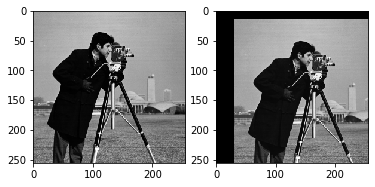

In [88]:
# make transform x->x+15, y->y+30
Tx = 15
Ty = 30

T = np.array([[1, 0, 0], [0, 1, 0], [Tx, Ty, 1]])
#T = [[1, 0, 0], [0, 1, 0], [Ty, Tx, 1]] # Transformation matrix
#T = np.linalg.inv(T)

# apply transform
iMax, jMax = np.shape(image)
iTranslated = 0
while iTranslated < iMax:

    jTranslated = 0
    while jTranslated < jMax:
        pixel_data = image[iTranslated, jTranslated]
        input_coords = np.array([iTranslated, jTranslated, 1])
        i_out, j_out, _ = np.dot(input_coords, T)
        if i_out < 256 and j_out < 256:
            imageTranslated[i_out, j_out] = pixel_data       
        jTranslated = jTranslated + 1
    iTranslated = iTranslated + 1


# Check result
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imageTranslated, cmap='gray')
plt.show()
